In [1]:
import bottleneck as bn
import matplotlib
import matplotlib.dates as mdates
import matplotlib.patheffects as pe
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import scienceplots
import scipy
import scipy.signal
import scipy.special
import scipy.stats
import sklearn.decomposition
import astropy.io
import datetime
import astropy.time
import pandas as pd
from scipy.signal import butter, filtfilt
import pywt
import ssqueezepy
import matplotlib.dates as mdate

import scipy.ndimage
import ssqueezepy
import numpy as np


from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.style.use(['science', 'nature', 'notebook', 'grid', 'high-vis'])
cmap = 'jet'


figsize_short = (8, 4)
figsize_normal = (8, 6)
figsize_tall = (8, 8)
plt.rcParams['figure.figsize'] = figsize_short
plt.rcParams['axes.labelpad'] = 6.0
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.framealpha'] = 0.8
plt.rcParams['legend.edgecolor'] = 'none'


title_font = {'fontsize': 16, 'weight': 'bold', 'style': 'italic'}
path_effect = [pe.withStroke(linewidth=2.0, foreground="k")]

read_path = 'docs/Data/'
save_path = 'docs/Figure/'

perula_df = pd.read_csv(read_path + 'matlab_perula.txt', header = None, sep = '\s+')
matlab_perula = matplotlib.colors.LinearSegmentedColormap.from_list('matlab_perula', np.array(perula_df))

jet_df = pd.read_csv(read_path + 'matlab_jet.txt', header = None, sep = '\s+')
matlab_jet = matplotlib.colors.LinearSegmentedColormap.from_list('matlab_jet', np.array(jet_df))

%matplotlib ipympl

<>:52: SyntaxWarning: invalid escape sequence '\s'
<>:55: SyntaxWarning: invalid escape sequence '\s'
<>:52: SyntaxWarning: invalid escape sequence '\s'
<>:55: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_36816\3826654839.py:52: SyntaxWarning: invalid escape sequence '\s'
  perula_df = pd.read_csv(read_path + 'matlab_perula.txt', header = None, sep = '\s+')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_36816\3826654839.py:55: SyntaxWarning: invalid escape sequence '\s'
  jet_df = pd.read_csv(read_path + 'matlab_jet.txt', header = None, sep = '\s+')


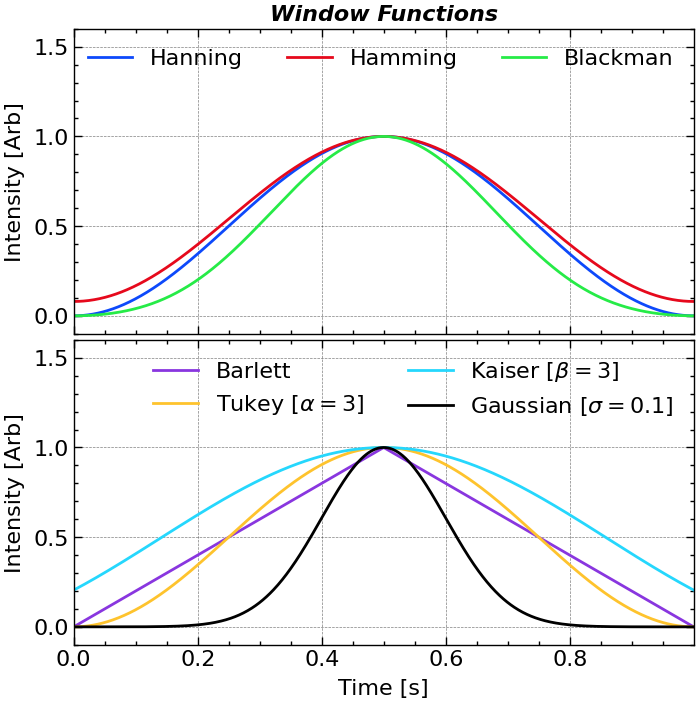

In [3]:
plt.close()
plt.figure(figsize = (8, 8))
plt.subplots_adjust(hspace = 0.02)
ax1 = plt.subplot(2, 1, 1)
ax2 = plt.subplot(2, 1, 2, sharex = ax1, sharey = ax1)

N = 2 ** 10
t = np.linspace(0, 1, N, endpoint = False)

ax1.plot(t, np.hanning(N), label = 'Hanning', linestyle = '-')
ax1.plot(t, np.hamming(N), label = 'Hamming', linestyle = '-')
ax1.plot(t, np.blackman(N), label = 'Blackman', linestyle = '-')

ax2.plot(t, np.bartlett(N), label = 'Barlett', linestyle = '-', color = 'C3')
ax2.plot(t, scipy.signal.windows.tukey(N, alpha = 3), label = r'Tukey [$\alpha=3$]', linestyle = '-', color = 'C4')
ax2.plot(t, scipy.signal.windows.kaiser(N, beta = 3), label = r'Kaiser [$\beta=3$]', linestyle = '-', color = 'C5')
ax2.plot(t, scipy.signal.windows.gaussian(N, std = N * 0.1), label = r'Gaussian [$\sigma=0.1$]', linestyle = '-', color = 'k')

ax1.set_ylim(-0.1, 1.6)
ax1.legend(frameon = False, ncol = 3)
ax2.legend(frameon = False, ncol = 2)
ax1.set_ylabel('Intensity [Arb]')
ax2.set_ylabel('Intensity [Arb]')
ax2.set_xlabel('Time [s]')
ax1.autoscale(axis = 'x', tight = True)

ax1.set_title('Window Functions', **title_font)

plt.setp(ax1.xaxis.get_majorticklabels(), visible = False)

# plt.tight_layout()

# plt.savefig(save_path + 'figure_window_functions' + '.png',bbox_inches='tight',dpi=300)

plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_30704\3349354388.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax1.scatter(np.cos(theta), np.sin(theta), cmap = 'bwr')


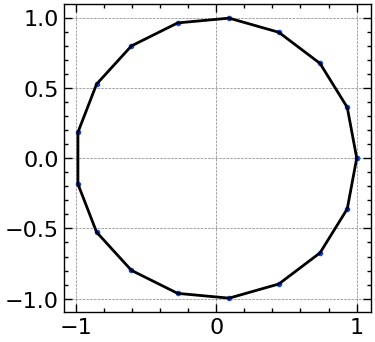

In [ ]:
plt.close()
ax1 = plt.subplot(1, 1, 1, aspect = 'equal')

theta = np.linspace(0, 2 * np.pi, 18, endpoint = True)

ax1.plot(np.cos(theta), np.sin(theta), 'k')
ax1.scatter(np.cos(theta), np.sin(theta), cmap = 'bwr')

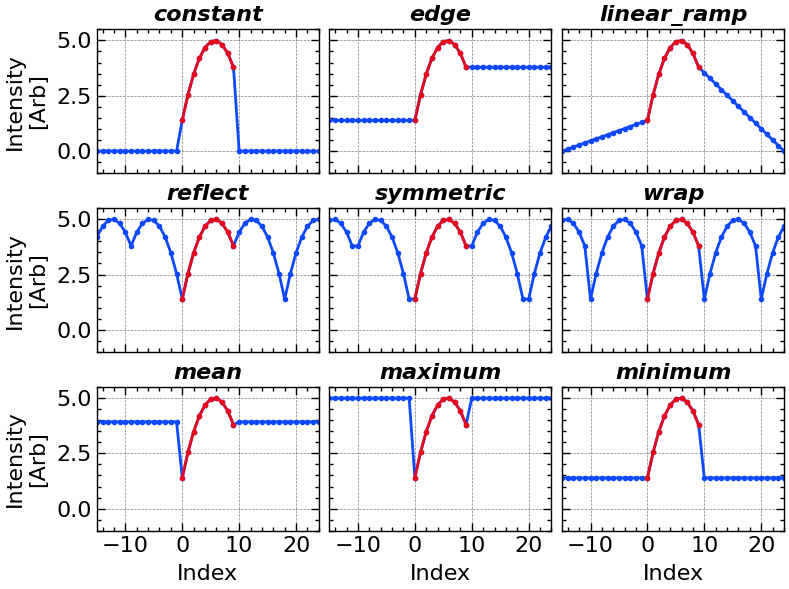

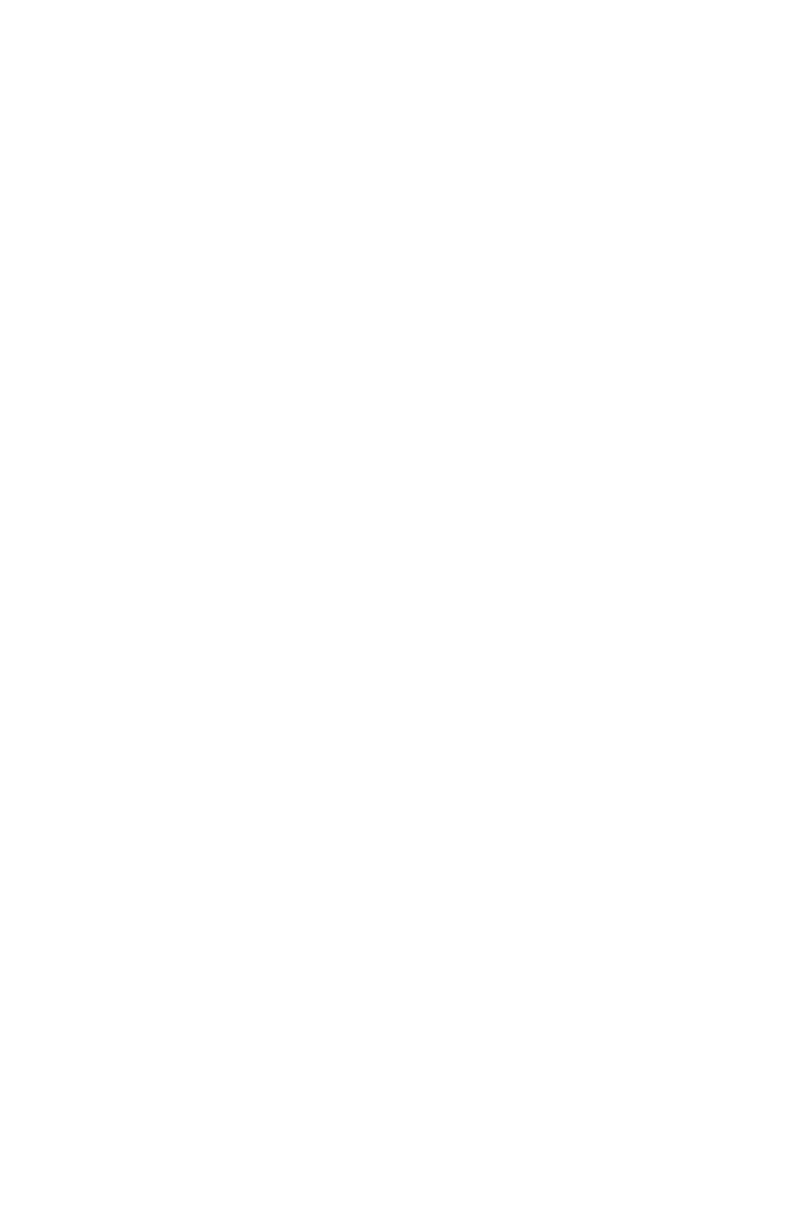

In [28]:
# synthetic test signal
sig = 5 - np.linspace(-1.9, 1.1, 10) ** 2

plt.close()
plt.subplots_adjust(hspace=0.02, wspace=0.02)
plt.figure(figsize = (8, 12))

fig, axes = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True)
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9 = axes.flatten()

pad_width = 15  # You can modify this value as needed
sig_padded = {
    'constant': np.pad(sig, pad_width=pad_width, mode='constant', constant_values=0),
    'edge': np.pad(sig, pad_width=pad_width, mode='edge'),
    'linear_ramp': np.pad(sig, pad_width=pad_width, mode='linear_ramp', end_values=(0, 0)),
    'reflect': np.pad(sig, pad_width=pad_width, mode='reflect'),
    'symmetric': np.pad(sig, pad_width=pad_width, mode='symmetric'),
    'wrap': np.pad(sig, pad_width=pad_width, mode='wrap'),
    'mean': np.pad(sig, pad_width=pad_width, mode='mean'),
    'maximum': np.pad(sig, pad_width=pad_width, mode='maximum'),
    'minimum': np.pad(sig, pad_width=pad_width, mode='minimum')
}

for ax, (key, padded_sig) in zip(axes.flatten(), sig_padded.items()):
    x_original = np.arange(len(sig))  # Indices for the original signal
    x_padded = np.arange(-pad_width, len(sig) + pad_width)  # Indices for the padded signal
    ax.plot(x_padded, padded_sig, 'o-', label='Padded Signal', color='C0')  # Padded signal in orange
    ax.plot(x_original, sig, 'o-', label='Original Signal', color='C1', zorder=2)  # Original signal in blue
    ax.set_xticks(np.arange(-30, 30, 10))  # Set xticks every 10
    ax.set_title(key, **title_font)
    ax.set_ylabel('Intensity\n[Arb]')
    ax.set_xlabel('Index')
    ax.label_outer()  # Hide labels on inner plots
    fig.set_size_inches(figsize_normal)
    ax.autoscale(axis='x', tight=True)
ax1.set_ylim(-1, 5.5)
# ax1.set_xlim(-15, 20.)
# Update the figure size to 8x6

# Add a legend to the first subplot
plt.tight_layout()
# axes.flatten()[0].legend(loc='upper center', frameon=False, ncol=2)
plt.savefig(save_path + 'figure_padding_type.png',bbox_inches='tight',dpi=300)

plt.show()